In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

Función Rastrigin Optimización gradiente númerico

In [ ]:
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def grad_num(x, funcion, h=0.01):
    gradiente = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        # (f(x + h) - f(x - h)) / (2 * h).
        gradiente[i] = (funcion(x + e) - funcion(x - e)) / (2 * h)
    return gradiente  # Devolvemos el gradiente calculado.


### Rastrigin 2D

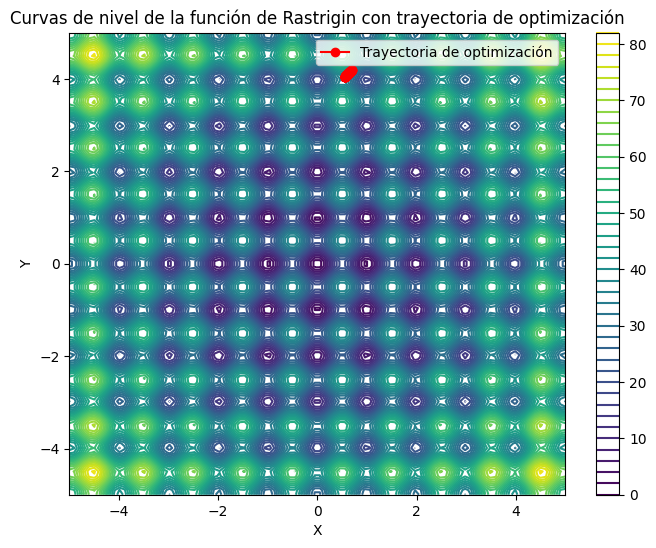

Mejor solución encontrada: [0.55849677 4.04353038]
Valor de la función en la mejor solución: 36.365886878370574


In [ ]:
# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Cálculo del gradiente numérico
def numerical_gradient(x, func, h=0.01):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        grad[i] = (func(x + e) - func(x - e)) / (2 * h)
    return grad

# Cálculo de la segunda derivada numérica (diagonal del Hessiano)
def numerical_second_derivative(x, func, h=0.01):
    hess_diag = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        hess_diag[i] = (func(x + e) - 2 * func(x) + func(x - e)) / (h ** 2)
    return hess_diag

# Optimizador con el gradiente y el Hessiano
def numerical_optimizer(x0, func, max_iter=100, h=0.01, eta=0.01):
    x = np.zeros((max_iter, len(x0)))
    x[0, :] = x0
    for i in range(1, max_iter):
        # Calcular el gradiente numérico
        grad = numerical_gradient(x[i - 1, :], func, h)

        # Calcular la segunda derivada numérica (Hessiano diagonal)
        hess_diag = numerical_second_derivative(x[i - 1, :], func, h)

        # Actualizar la posición usando el gradiente
        step = -eta * grad / (hess_diag + 1e-6)  # Para evitar divisiones por cero
        x[i, :] = x[i - 1, :] + step

        # Condición de parada si el cambio es muy pequeño
        if np.linalg.norm(step) < 1e-7:
            break

    return x[:i + 1, :]

# Ejemplo de uso en 2D para visualizar
x0 = np.array([0.7, 4.2])  # Punto inicial en 2D
result = numerical_optimizer(x0, rastrigin, max_iter=100, eta=0.01)

# Graficar las curvas de nivel para visualizar la trayectoria de optimización
x_t = np.linspace(-5, 5, 100)
y_t = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.plot(result[:, 0], result[:, 1], 'o-', color='red', label="Trayectoria de optimización")
plt.title('Curvas de nivel de la función de Rastrigin con trayectoria de optimización')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.legend()
plt.show()
print(f"Mejor solución encontrada: {result[-1]}")
print(f"Valor de la función en la mejor solución: {rastrigin(result[-1])}")


### Rastrigin 3D, input 2D

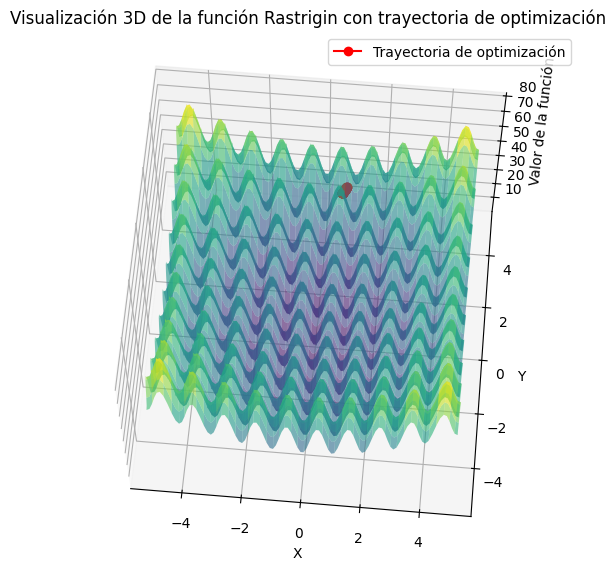

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Superficie 3D
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Traza la trayectoria de optimización
ax.plot(result[:, 0], result[:, 1], [rastrigin(point) for point in result], color='r', marker='o', label="Trayectoria de optimización")

# Títulos y etiquetas
ax.set_title('Visualización 3D de la función Rastrigin con trayectoria de optimización')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valor de la función')
ax.legend()
ax.view_init(elev=65, azim=-85)

plt.show()

### Rastrigin gradiente Input 3D

In [ ]:
# Punto inicial
x0 = np.array(([0.7, 4.2, 3.8]))
result = numerical_optimizer(x0, rastrigin, max_iter=300, eta=0.01)

print(f"Mejor solución encontrada: {result[-1]}")
print(f"Valor de la función en la mejor solución: {rastrigin(result[-1])}")


Mejor solución encontrada: [0.50987626 3.98828145 3.97322016]
Valor de la función en la mejor solución: 52.1019161458433


PSO 2D

In [ ]:
!pip install pyswarms

### PSO 2D

2024-11-29 23:00:57,836 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00145
2024-11-29 23:00:58,316 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.001447633562356998, best pos: [0.00252835 0.00095102]


Mejor posición encontrada por PSO: [0.00252835 0.00095102]
Mejor costo encontrado por PSO: 0.001447633562356998


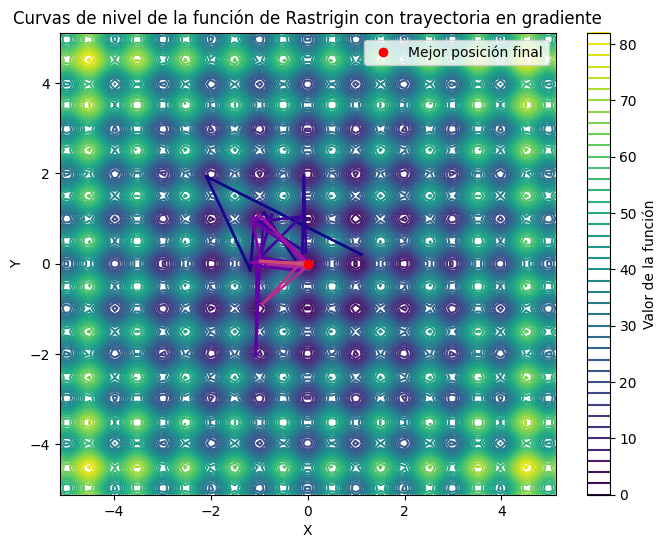

In [ ]:
import matplotlib.cm as cm
import pyswarms as ps

# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Wrapping the function for PSO
def rastrigin_pso(x):
    return np.array([rastrigin(p) for p in x])

# Configuración de los límites de búsqueda
bounds = (np.array([-5.12, -5.12]), np.array([5.12, 5.12]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Rastrigin
cost, pos = optimizer.optimize(rastrigin_pso, iters=100)

# Extraer el historial de posiciones de la mejor partícula
best_particle_positions = optimizer.pos_history
best_particle = np.array([p[np.argmin(rastrigin_pso(p))] for p in best_particle_positions])

# Resultados
print(f"Mejor posición encontrada por PSO: {pos}")
print(f"Mejor costo encontrado por PSO: {cost}")

# Graficar la función y la trayectoria de la mejor partícula
x_t = np.linspace(-5.12, 5.12, 100)
y_t = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear gradiente de colores con un cmap diferente
colors = cm.plasma(np.linspace(0, 1, len(best_particle) - 1))  # Cambiado a 'plasma'

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Cambiado a 'plasma'
for i in range(len(best_particle) - 1):
    plt.plot(
        [best_particle[i, 0], best_particle[i + 1, 0]],
        [best_particle[i, 1], best_particle[i + 1, 1]],
        color=colors[i],
        linewidth=2,
    )
plt.plot(pos[0], pos[1], 'ro', label="Mejor posición final")
plt.title('Curvas de nivel de la función de Rastrigin con trayectoria en gradiente')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Valor de la función')
plt.legend()
plt.show()


### GRAFICA PSO 3D, input 2D

In [ ]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.2 MB/s eta 0:00:00


2024-11-29 22:59:28,161 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.22e-5
2024-11-29 22:59:28,562 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.222595388052696e-05, best pos: [ 0.0003503  -0.00019931]


Mejor posición encontrada por PSO: [ 0.0003503  -0.00019931]
Mejor costo encontrado por PSO: 3.222595388052696e-05


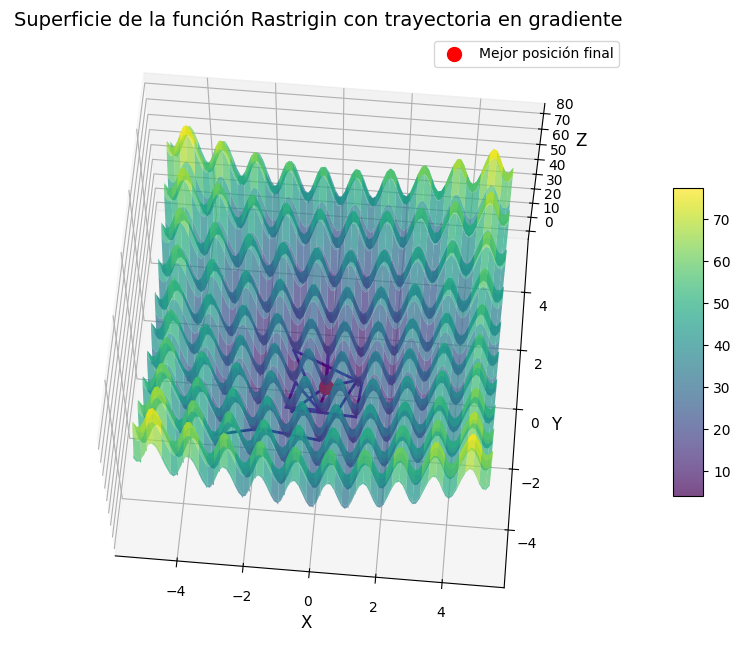

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import pyswarms as ps

# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Wrapping the function for PSO
def rastrigin_pso(x):
    return np.array([rastrigin(p) for p in x])

# Configuración de los límites de búsqueda
bounds = (np.array([-5.12, -5.12]), np.array([5.12, 5.12]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Rastrigin
cost, pos = optimizer.optimize(rastrigin_pso, iters=100)

# Extraer el historial de posiciones de la mejor partícula
best_particle_positions = optimizer.pos_history
best_particle = np.array([p[np.argmin(rastrigin_pso(p))] for p in best_particle_positions])

# Resultados
print(f"Mejor posición encontrada por PSO: {pos}")
print(f"Mejor costo encontrado por PSO: {cost}")

# Generar datos para la superficie en 3D
x_t = np.linspace(-5.12, 5.12, 100)
y_t = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear gradiente de colores con un cmap
colors = cm.plasma(np.linspace(0, 1, len(best_particle) - 1))

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Graficar la trayectoria de la mejor partícula
for i in range(len(best_particle) - 1):
    current = best_particle[i]
    next_pos = best_particle[i + 1]
    ax.plot(
        [current[0], next_pos[0]],
        [current[1], next_pos[1]],
        [rastrigin(current), rastrigin(next_pos)],
        color=colors[i],
        linewidth=2,
    )

# Destacar la mejor posición final
ax.scatter(pos[0], pos[1], rastrigin(pos), color='red', s=100, label='Mejor posición final', marker='o')

# Ajustes de la gráfica
ax.set_title('Superficie de la función Rastrigin con trayectoria en gradiente', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)  # Cambiar ángulo de la cámara para mayor claridad
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

plt.show()



### PSO 3D optimización

In [ ]:
np.random.seed(0)
# Configuración de los límites de búsqueda
bounds = (np.array([-5.12, -5.12, -5.12]), np.array([5.12, 5.12, 5.12]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer_3D = ps.single.GlobalBestPSO(n_particles=20, dimensions=3, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Rastrigin
cost_3D, pos_3D = optimizer_3D.optimize(rastrigin_pso, iters=100)

# Extraer el historial de posiciones de la mejor partícula
#best_particle_positions_3D = optimizer_3D.pos_history
#best_particle_3D = np.array([p[np.argmin(rastrigin_pso(p))] for p in best_particle_positions_3D])

# Resultados
print(f"Mejor posición encontrada por PSO: {pos_3D}")
print(f"Mejor costo encontrado por PSO: {cost_3D}")
print("En este caso se econtró el mínimo global ubicado en el orígen")

2024-11-29 23:00:42,085 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.025
2024-11-29 23:00:42,945 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.024990576717168977, best pos: [0.00216525 0.00711164 0.00840992]


Mejor posición encontrada por PSO: [0.00216525 0.00711164 0.00840992]
Mejor costo encontrado por PSO: 0.024990576717168977
En este caso se econtró el mínimo global ubicado en el orígen


In [ ]:
!pip install pygad

### Algoritmo evolutivo PYGAD

Mejor solución encontrada: [-0.00562681  0.05236161]
Costo asociado a la solución: 0.545355843383831


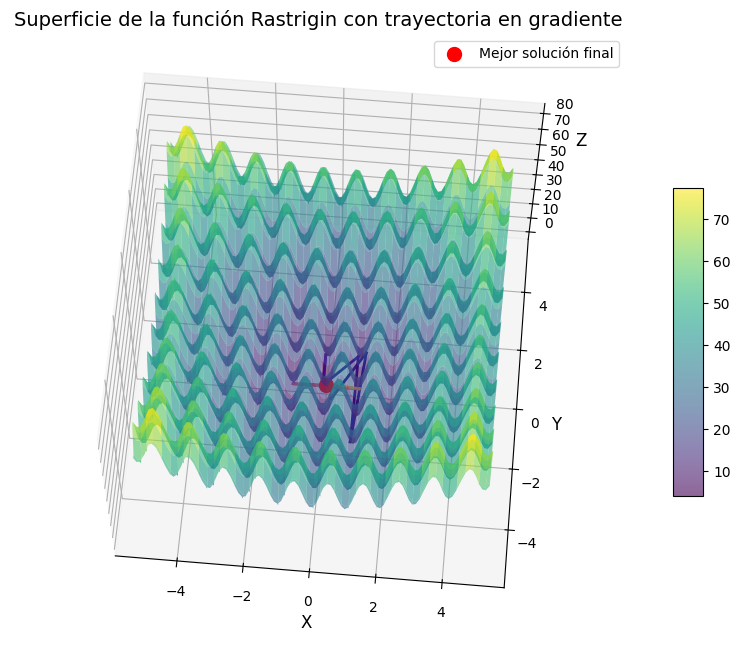

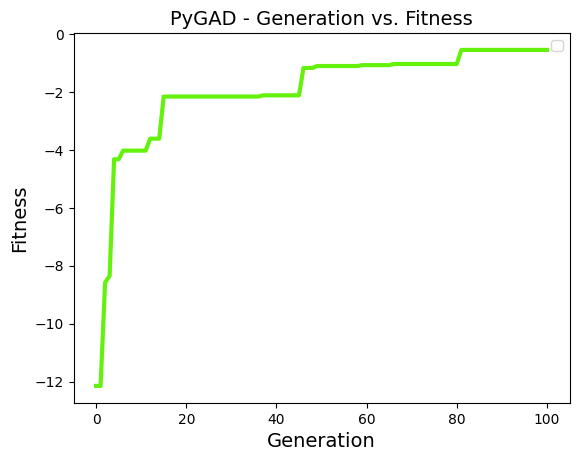

In [ ]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
np.random.seed(0)
# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Wrapping the function for PyGAD
def fitness_function(ga_instance, solution, solution_idx):
    # PyGAD maximiza por defecto, por lo que invertimos el signo para minimizar
    return -rastrigin(solution)

# Lista para almacenar los mejores puntos en cada generación
best_solutions = []

# Función para registrar el mejor punto al final de cada generación
def on_generation(ga_instance):
    best_solutions.append(ga_instance.best_solution()[0])  # Almacenar solo los genes de la mejor solución

# Configuración del algoritmo genético
gene_space = {'low': -5.12, 'high': 5.12}  # Rango de valores para cada gen

ga_instance = pygad.GA(
    num_generations=100,          # Número de generaciones
    num_parents_mating=10,        # Número de padres para apareamiento
    fitness_func=fitness_function,  # Función de fitness
    sol_per_pop=20,               # Número de soluciones por población
    num_genes=2,                  # Dimensión del problema
    gene_space=gene_space,        # Espacio de búsqueda
    parent_selection_type="sss",  # Selección de padres
    keep_parents=2,               # Número de padres que se mantienen
    crossover_type="single_point", # Tipo de crossover
    mutation_type="random",       # Tipo de mutación
    mutation_num_genes=1,    # Número de genes que se mutan
    random_seed=0,                # Semilla para reproducibilidad
    on_generation=on_generation   # Registrar el mejor punto al final de cada generación
)

# Correr el algoritmo genético
ga_instance.run()

# Convertir la lista de mejores soluciones en un array
best_solutions = np.array(best_solutions)

# Obtener la mejor solución
solution, solution_fitness, _ = ga_instance.best_solution()
solution_cost = -solution_fitness  # Invertimos el signo porque maximizamos

# Resultados
print(f"Mejor solución encontrada: {solution}")
print(f"Costo asociado a la solución: {solution_cost}")

# Generar datos para la superficie en 3D
x_t = np.linspace(-5.12, 5.12, 100)
y_t = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Gradiente de colores para la trayectoria
colors = cm.plasma(np.linspace(0, 1, len(best_solutions) - 1))

# Destacar la trayectoria de los mejores puntos con gradiente
for i in range(len(best_solutions) - 1):
    current = best_solutions[i]
    next_pos = best_solutions[i + 1]
    ax.plot(
        [current[0], next_pos[0]],
        [current[1], next_pos[1]],
        [rastrigin(current), rastrigin(next_pos)],
        color=colors[i],
        linewidth=2,
    )

# Destacar la mejor posición final encontrada
ax.scatter(solution[0], solution[1], rastrigin(solution), color='red', s=100, label='Mejor solución final', marker='o')

# Ajustes adicionales
ax.set_title('Superficie de la función Rastrigin con trayectoria en gradiente', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

# Gráfica del error a través de las iteraciones
ga_instance.plot_fitness()

plt.show()





### Gif PYGAD

In [ ]:
import matplotlib.animation as animation
from IPython.display import Image, display
# Función de inicialización
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma
def update(frame):
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    colors = cm.plasma(np.linspace(0, 1, len(best_solutions) - 1))
    for i in range(min(frame, len(best_solutions) - 1)):
        current = best_solutions[i]
        next_pos = best_solutions[i + 1]
        ax.plot(
            [current[0], next_pos[0]],
            [current[1], next_pos[1]],
            [rastrigin(current), rastrigin(next_pos)],
            color=colors[i],
            linewidth=2,
        )
    # Mejor posición final destacada
    ax.scatter(
        best_solutions[frame, 0],
        best_solutions[frame, 1],
        rastrigin(best_solutions[frame]),
        color='red',
        s=100,
        label='Mejor solución'
    )
    ax.set_title('Visualización 3D de la función Rastrigin con algoritmo evolutivo', fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(best_solutions), init_func=init, blit=False)

# Guardar el GIF
ani.save('evolutionary_algorithm_trajectory_3d.gif', writer='imagemagick', fps=30)

# Mostrar el GIF
from IPython.display import Image
display(Image(url='evolutionary_algorithm_trajectory_3d.gif'))



2024-11-30 00:03:05,605 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-11-30 00:03:05,608 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


SI FUNCIONA SOLO QUE ACÁ NO LO ESTÁ PINTANDO, DESCARGADO FUNCIONA

### Pygad 3D

In [ ]:
np.random.seed(0)
# Lista para almacenar los mejores puntos en cada generación
best_solutions_3D = []

# Callback para registrar los mejores puntos
def on_generation(ga_instance):
    best_solutions_3D.append(ga_instance.best_solution()[0])  # Solo genes de la mejor solución

# Configuración del algoritmo genético
gene_space = {'low': -5.12, 'high': 5.12}  # Rango de valores para cada gen

ga_instance_3D = pygad.GA(
    num_generations=150,          # Número de generaciones
    num_parents_mating=10,        # Número de padres para apareamiento
    fitness_func=fitness_function,  # Función de fitness
    sol_per_pop=20,               # Número de soluciones por población
    num_genes=3,                  # ¡Cambiado a 3 dimensiones!
    gene_space=gene_space,        # Espacio de búsqueda
    parent_selection_type="sss",  # Selección de padres
    keep_parents=2,               # Número de padres que se mantienen
    crossover_type="single_point", # Tipo de crossover
    mutation_type="random",       # Tipo de mutación
    mutation_num_genes=1,    # Número de genes que se mutan
    random_seed=0,                # Semilla para reproducibilidad
    on_generation=on_generation   # Registrar el mejor punto al final de cada generación
)

# Correr el algoritmo genético
ga_instance_3D.run()

# Convertir la lista de mejores soluciones en un array
best_solutions_3D = np.array(best_solutions_3D)

# Obtener la mejor solución
solution_3D, solution_fitness_3D, _ = ga_instance_3D.best_solution()
solution_cost_3D = -solution_fitness_3D  # Invertimos el signo porque maximizamos

# Resultados
print(f"Mejor solución encontrada: {solution_3D}")
print(f"Costo asociado a la solución: {solution_cost_3D}")


Mejor solución encontrada: [ 0.02450733  0.00026929 -0.00387879]
Costo asociado a la solución: 0.1219210857902624






##Evolución diferencial

differential_evolution step 1: f(x)= 5.7587165437484025
differential_evolution step 2: f(x)= 2.600344752705876
differential_evolution step 3: f(x)= 2.600344752705876
differential_evolution step 4: f(x)= 2.600344752705876
differential_evolution step 5: f(x)= 2.600344752705876
differential_evolution step 6: f(x)= 2.600344752705876
differential_evolution step 7: f(x)= 2.600344752705876
differential_evolution step 8: f(x)= 0.9647330801619631
differential_evolution step 9: f(x)= 0.9647330801619631
differential_evolution step 10: f(x)= 0.9647330801619631
differential_evolution step 11: f(x)= 0.9647330801619631
differential_evolution step 12: f(x)= 0.9647330801619631
differential_evolution step 13: f(x)= 0.5778405939607474
differential_evolution step 14: f(x)= 0.5778405939607474
differential_evolution step 15: f(x)= 0.5778405939607474
differential_evolution step 16: f(x)= 0.06585234581025645
differential_evolution step 17: f(x)= 0.06585234581025645
differential_evolution step 18: f(x)= 0.0658

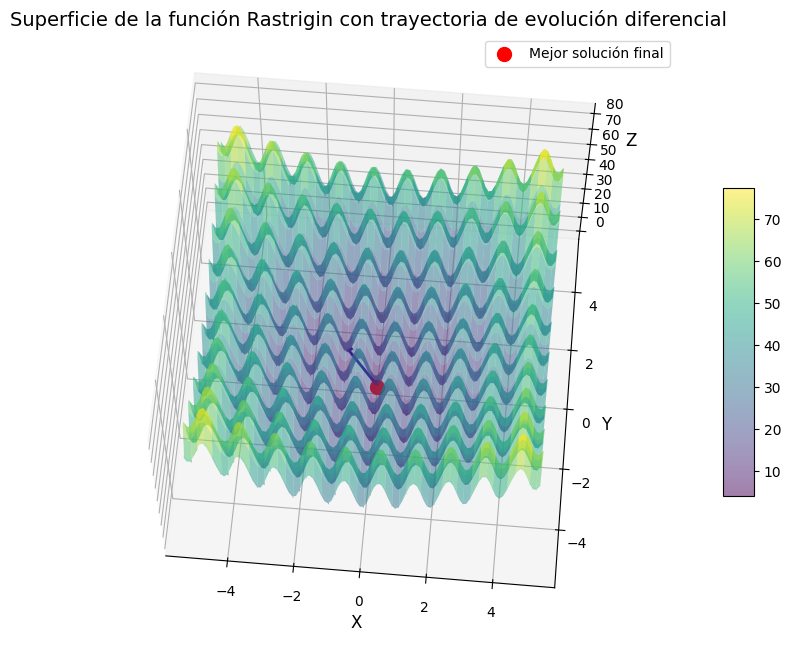

Se puede apreciar que el algoritmo convergió al mínimo global de la función [ 2.49019422e-09 -8.70551276e-10]


In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Definición de la función Rastrigin
def rastrigin(x):
    x = np.array(x)  # Asegurar que x sea un numpy array
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Configuración de los límites de búsqueda
bounds = [(-5.12, 5.12), (-5.12, 5.12)]  # Límites para cada dimensión

# Lista para registrar las soluciones óptimas en cada iteración
solutions_history = []

# Callback para registrar la trayectoria
def callback(x, convergence):
    solutions_history.append(np.array(x))  # Convertir la solución a un array


# Ejecutar Evolución Diferencial
result = differential_evolution(
    rastrigin,
    bounds,
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    mutation=(0.4, 1.5),
    recombination=0.8,
    seed=0,
    disp=True,
    callback=callback,
)

# Convertir la trayectoria a un array
solutions_history = np.array(solutions_history)

# Generar datos para la superficie en 3D
x_t = np.linspace(-5.12, 5.12, 100)
y_t = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin([X[i, j], Y[i, j], 0]) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, edgecolor='none')

# Graficar la trayectoria de las soluciones óptimas
colors = cm.plasma(np.linspace(0, 1, len(solutions_history) - 1))
for i in range(len(solutions_history) - 1):
    current = solutions_history[i]
    next_pos = solutions_history[i + 1]
    ax.plot(
        [current[0], next_pos[0]],
        [current[1], next_pos[1]],
        [rastrigin([current[0], current[1], 0]), rastrigin([next_pos[0], next_pos[1], 0])],
        color=colors[i], linewidth=2,
    )

# Destacar la mejor posición final
final_solution = result.x
ax.scatter(
    final_solution[0], final_solution[1], rastrigin(final_solution),
    color='red', s=100, label='Mejor solución final', marker='o'
)

# Ajustes adicionales
ax.set_title('Superficie de la función Rastrigin con trayectoria de evolución diferencial', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)  # Cambiar ángulo de la cámara para mayor claridad
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

plt.show()
print("Se puede apreciar que el algoritmo convergió al mínimo global de la función", result.x)

Evolución diferencial 3D

In [ ]:
# Configuración del algoritmo
bounds = [(-10, 10), (-10, 10), (-10, 10)]  # Límites para cada dimensión

result = differential_evolution(
    rastrigin,
    bounds,
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    mutation=(0.4, 1.5),
    recombination=0.8,
    seed=0,
    disp=True
)

# Resultados
print(f"\nMejor solución encontrada: {result.x}")
print(f"Costo asociado a la mejor solución: {result.fun}")
print("Se obtuvo como mínimo, el mínimo global")

differential_evolution step 1: f(x)= 27.36506479323773
differential_evolution step 2: f(x)= 27.36506479323773
differential_evolution step 3: f(x)= 22.07822037181893
differential_evolution step 4: f(x)= 10.41936630505333
differential_evolution step 5: f(x)= 10.41936630505333
differential_evolution step 6: f(x)= 10.41936630505333
differential_evolution step 7: f(x)= 10.41936630505333
differential_evolution step 8: f(x)= 10.41936630505333
differential_evolution step 9: f(x)= 10.41936630505333
differential_evolution step 10: f(x)= 10.350394773962318
differential_evolution step 11: f(x)= 10.350394773962318
differential_evolution step 12: f(x)= 9.105184587241471
differential_evolution step 13: f(x)= 9.105184587241471
differential_evolution step 14: f(x)= 8.559581267097158
differential_evolution step 15: f(x)= 8.559581267097158
differential_evolution step 16: f(x)= 8.559581267097158
differential_evolution step 17: f(x)= 5.612046323986814
differential_evolution step 18: f(x)= 5.612046323986814

### Gif 2D Rastrigin

Última posición encontrada: [0.5051852  3.98284099]
Valor de la función en esa posición: 36.17098996240654


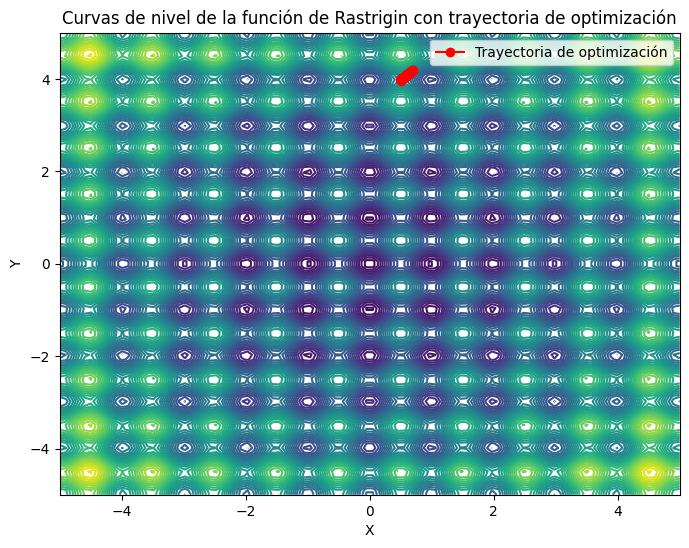

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Cálculo del gradiente numérico
def numerical_gradient(x, func, h=0.01):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        grad[i] = (func(x + e) - func(x - e)) / (2 * h)
    return grad

# Cálculo de la segunda derivada numérica (diagonal del Hessiano)
def numerical_second_derivative(x, func, h=0.01):
    hess_diag = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        hess_diag[i] = (func(x + e) - 2 * func(x) + func(x - e)) / (h ** 2)
    return hess_diag

# Optimizador con el gradiente y el Hessiano
def numerical_optimizer(x0, func, max_iter=100, h=0.01, eta=0.01):
    x = np.zeros((max_iter, len(x0)))
    x[0, :] = x0
    for i in range(1, max_iter):
        # Calcular el gradiente numérico
        grad = numerical_gradient(x[i - 1, :], func, h)

        # Calcular la segunda derivada numérica (Hessiano diagonal)
        hess_diag = numerical_second_derivative(x[i - 1, :], func, h)

        # Actualizar la posición usando el gradiente
        step = -eta * grad / (hess_diag + 1e-6)  # Para evitar divisiones por cero
        x[i, :] = x[i - 1, :] + step

        # Condición de parada si el cambio es muy pequeño
        if np.linalg.norm(step) < 1e-7:
            break

    return x[:i + 1, :]

# Ejemplo de uso en 2D para visualizar
x0 = np.array([0.7, 4.2])  # Punto inicial en 2D
result = numerical_optimizer(x0, rastrigin, max_iter=200, eta=0.02)

# Graficar las curvas de nivel para visualizar la trayectoria de optimización
x_t = np.linspace(-5, 5, 100)
y_t = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, levels=50)
line, = ax.plot([], [], 'o-', color='red', label="Trayectoria de optimización")
ax.set_title('Curvas de nivel de la función de Rastrigin con trayectoria de optimización')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Función de inicialización de la animación
def init():
    line.set_data([], [])
    return line,

# Función de actualización para cada frame de la animación
def update(frame):
    line.set_data(result[:frame+1, 0], result[:frame+1, 1])
    return line,
# Extraer el último punto encontrado
last_position = result[-1]
last_value = rastrigin(last_position)

print("Última posición encontrada:", last_position)
print("Valor de la función en esa posición:", last_value)
# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(result), init_func=init, blit=True)

# Guardar el GIF
ani.save('optimization_trajectory.gif', writer='imagemagick', fps=30)

plt.show()


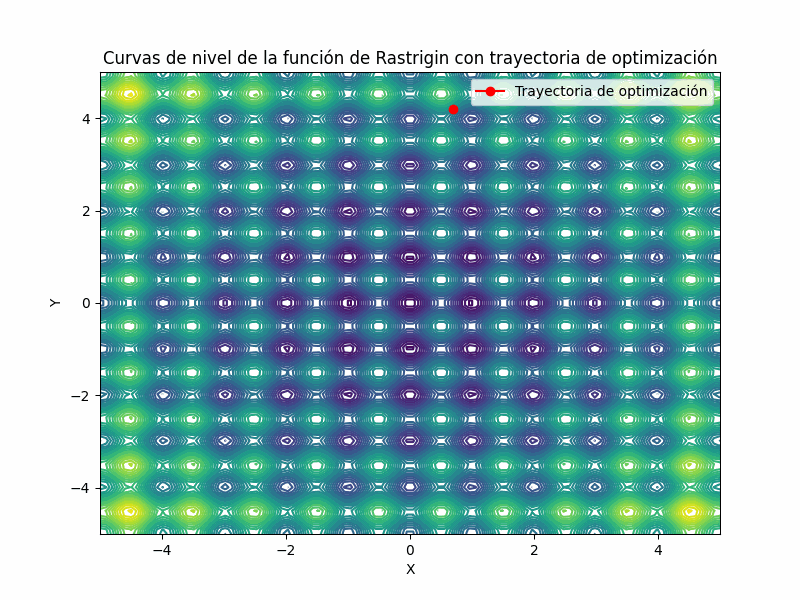

In [ ]:
from IPython.display import Image, display

# Después de guardar el GIF
ani.save('optimization_trajectory.gif', writer='imagemagick', fps=30)

# Mostrar el GIF en el notebook
display(Image(filename='optimization_trajectory.gif'))


### Gif 3D Rastrigin

2024-11-29 23:56:16,153 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-11-29 23:56:16,155 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


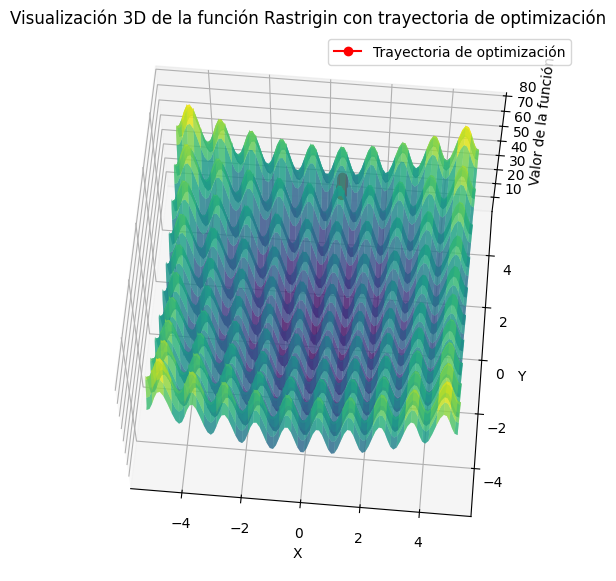

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display

# Definición de la función Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Cálculo del gradiente numérico
def numerical_gradient(x, func, h=0.01):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        grad[i] = (func(x + e) - func(x - e)) / (2 * h)
    return grad

# Cálculo de la segunda derivada numérica (diagonal del Hessiano)
def numerical_second_derivative(x, func, h=0.01):
    hess_diag = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        hess_diag[i] = (func(x + e) - 2 * func(x) + func(x - e)) / (h ** 2)
    return hess_diag

# Optimizador con el gradiente y el Hessiano
def numerical_optimizer(x0, func, max_iter=100, h=0.01, eta=0.02):
    x = np.zeros((max_iter, len(x0)))
    x[0, :] = x0
    for i in range(1, max_iter):
        # Calcular el gradiente numérico
        grad = numerical_gradient(x[i - 1, :], func, h)

        # Calcular la segunda derivada numérica (Hessiano diagonal)
        hess_diag = numerical_second_derivative(x[i - 1, :], func, h)

        # Actualizar la posición usando el gradiente
        step = -eta * grad / (hess_diag + 1e-6)  # Para evitar divisiones por cero
        x[i, :] = x[i - 1, :] + step

        # Condición de parada si el cambio es muy pequeño
        if np.linalg.norm(step) < 1e-7:
            break

    return x[:i + 1, :]

# Ejemplo de uso en 2D para visualizar
x0 = np.array([0.53, 4.2])  # Punto inicial en 2D
result = numerical_optimizer(x0, rastrigin, max_iter=200, eta=0.01)

# Graficar las curvas de nivel para visualizar la trayectoria de optimización
x_t = np.linspace(-5, 5, 100)
y_t = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([rastrigin(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear la figura 3D para la animación
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Función de inicialización para la animación
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma de la animación
def update(frame):
    ax.clear()  # Limpiar el gráfico para actualizar
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    ax.plot(result[:frame+1, 0], result[:frame+1, 1], [rastrigin(point) for point in result[:frame+1]], color='r', marker='o', label="Trayectoria de optimización")
    ax.set_title('Visualización 3D de la función Rastrigin con trayectoria de optimización')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.legend()
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(result), init_func=init, blit=False)

# Guardar el GIF
ani.save('optimization_trajectory_3d.gif', writer='imagemagick', fps=30)



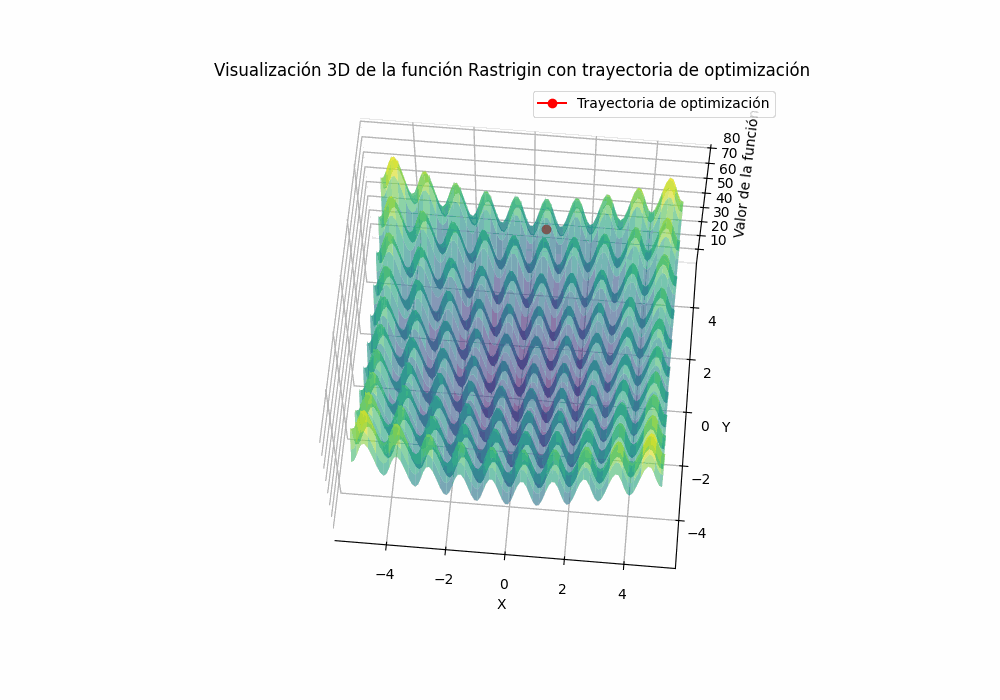

In [ ]:
from IPython.display import Image as IPImage

# Mostrar el GIF en Colab
display(Image(filename='optimization_trajectory_3d.gif'))

# TRATAR DE UNIR EL GIF

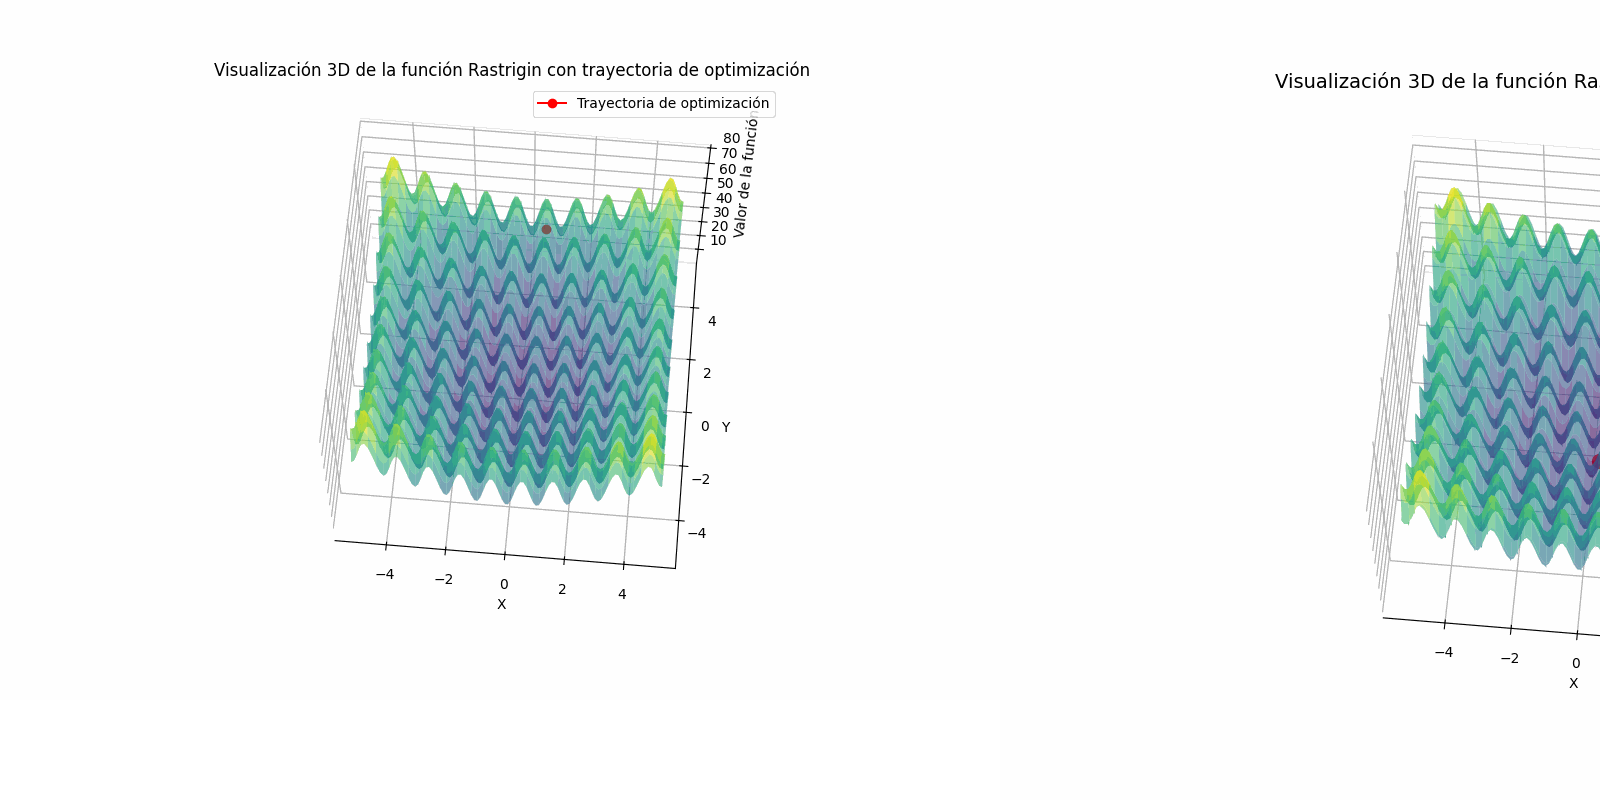

In [ ]:
from PIL import Image, ImageSequence

# Cargar los dos GIFs
gif_gradiente = "optimization_trajectory_3d.gif"  # Optimización con gradiente
gif_evolutivo = "evolutionary_algorithm_trajectory_3d.gif"  # Algoritmo evolutivo

# Abrir los GIFs
gif1 = Image.open(gif_gradiente)
gif2 = Image.open(gif_evolutivo)

# Crear una lista para los cuadros combinados
frames = []

# Iterar sobre los cuadros de ambos GIFs
for frame1, frame2 in zip(ImageSequence.Iterator(gif1), ImageSequence.Iterator(gif2)):
    # Convertir ambos cuadros a RGBA para consistencia
    frame1 = frame1.convert("RGBA")
    frame2 = frame2.convert("RGBA")

    # Alinear ambos cuadros horizontalmente
    combined_width = frame1.width + frame2.width
    combined_height = max(frame1.height, frame2.height)
    combined_frame = Image.new("RGBA", (combined_width, combined_height))
    combined_frame.paste(frame1, (0, 0))
    combined_frame.paste(frame2, (frame1.width, 0))

    # Añadir el cuadro combinado a la lista
    frames.append(combined_frame)

# Guardar el GIF combinado con mayor duración
output_gif = "combined_optimization_slow.gif"
frames[0].save(
    output_gif,
    save_all=True,
    append_images=frames[1:],
    duration=200,  # Duración de cada fotograma en milisegundos (más lento)
    loop=0  # Repetir indefinidamente
)

# Mostrar el GIF combinado
from IPython.display import Image as IPImage
display(IPImage(output_gif))



In [ ]:
!pip install PyGAD

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Mejor solución: [ 0.00707163 -0.00353692]
Fitness de la mejor solución: -0.012401306240791499


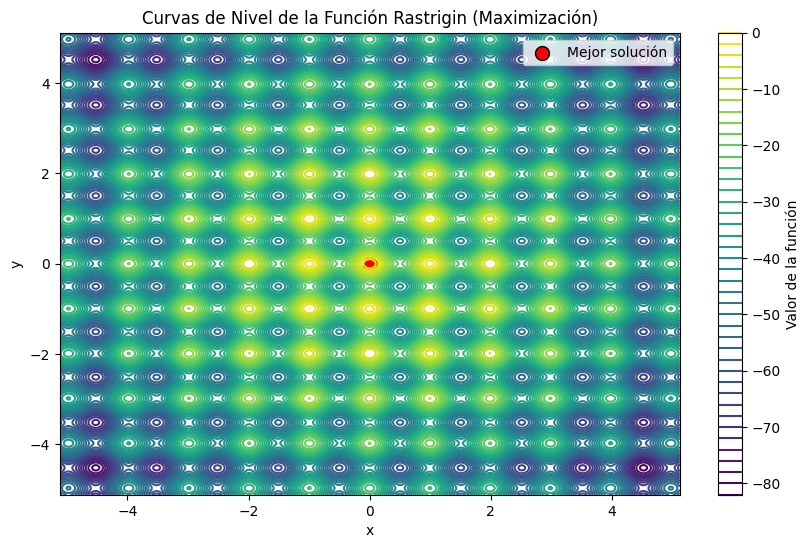

In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Modificación de la función Rastrigin para maximizarla
def rastrigin2d_vec_inv(solution):
    x1, x2 = solution  # Desempaquetamos las dos variables
    y = 20 + x1**2 - 10 * np.cos(2 * np.pi * x1) + x2**2 - 10 * np.cos(2 * np.pi * x2)
    return -y  # Retornamos el negativo para maximizar la función

# Función de fitness ajustada para usar tres parámetros
def fitness_func(ga_instance, solution, solution_idx):
    fitness = rastrigin2d_vec_inv(solution)  # Maximización
    return fitness

# Configuración del algoritmo genético
ga_instance = pygad.GA(
    num_generations=100,          # Número de generaciones
    sol_per_pop=20,               # Soluciones por población
    num_genes=2,                  # Dos variables (x e y)
    fitness_func=fitness_func,    # Función de fitness
    num_parents_mating=4,         # Número de padres para cruce
    parent_selection_type="sss",  # Selección de padres
    crossover_type="single_point",# Tipo de cruce
    mutation_type="random",       # Tipo de mutación
    mutation_probability=0.6,     # Probabilidad de mutación
    gene_space=[                  # Espacio de búsqueda
        {"low": -5.12, "high": 5.12},  # Rango para x e y
        {"low": -5.12, "high": 5.12}
    ]
)

# Ejecutar el algoritmo genético
ga_instance.run()

# Obtener la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Mejor solución: {solution}")
print(f"Fitness de la mejor solución: {solution_fitness}")

# Graficar las curvas de nivel y la solución
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(x, y)

# Calcular Z usando la función Rastrigin para cada punto de la malla
Z = np.zeros(X.shape)  # Inicializamos Z con la misma forma que X y Y
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rastrigin2d_vec_inv([X[i, j], Y[i, j]])

# Graficar las curvas de nivel
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Valor de la función')

# Marcar la solución encontrada
plt.scatter(solution[0], solution[1], color='red', label='Mejor solución', s=100, edgecolors='black')
plt.title('Curvas de Nivel de la Función Rastrigin (Maximización)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()






# FUNCION DE GRIEWANK

### Grafico 2D

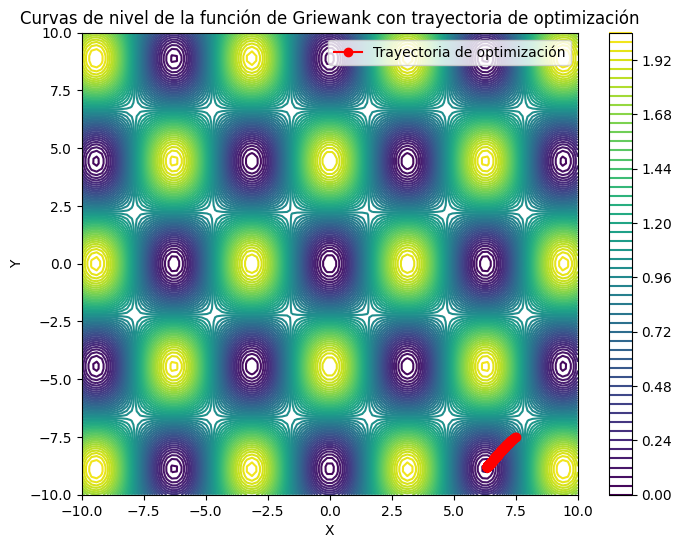

Mejor solución encontrada: [ 6.3263688  -8.81900364]
Valor de la función en la mejor solución: 0.03149475766910026


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# Definición de la función Griewank
def griewank(x):
    n = len(x)
    term1 = np.sum(x**2) / 4000
    term2 = np.prod(np.cos(x / np.sqrt(np.arange(1, n + 1))))
    return 1 + term1 - term2

# Cálculo del gradiente numérico
def numerical_gradient(x, func, h=0.01):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        grad[i] = (func(x + e) - func(x - e)) / (2 * h)
    return grad

# Cálculo de la segunda derivada numérica (diagonal del Hessiano)
def numerical_second_derivative(x, func, h=0.01):
    hess_diag = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        hess_diag[i] = (func(x + e) - 2 * func(x) + func(x - e)) / (h ** 2)
    return hess_diag

# Optimizador con el gradiente y el Hessiano
def numerical_optimizer(x0, func, max_iter=100, h=0.01, eta=0.01):
    x = np.zeros((max_iter, len(x0)))
    x[0, :] = x0
    for i in range(1, max_iter):
        # Calcular el gradiente numérico
        grad = numerical_gradient(x[i - 1, :], func, h)

        # Calcular la segunda derivada numérica (Hessiano diagonal)
        hess_diag = numerical_second_derivative(x[i - 1, :], func, h)

        # Actualizar la posición usando el gradiente
        step = -eta * grad / (hess_diag + 1e-6)  # Para evitar divisiones por cero
        x[i, :] = x[i - 1, :] + step

        # Condición de parada si el cambio es muy pequeño
        if np.linalg.norm(step) < 1e-7:
            break

    return x[:i + 1, :]


# Ejemplo de uso en 2D para visualizar
x0 = np.array([7.5, -7.5])
result = numerical_optimizer(x0, griewank, max_iter=300, eta=0.01)

# Graficar las curvas de nivel para visualizar la trayectoria de optimización
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.plot(result[:, 0], result[:, 1], 'o-', color='red', label="Trayectoria de optimización")
plt.title('Curvas de nivel de la función de Griewank con trayectoria de optimización')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.legend()
plt.show()
print(f"Mejor solución encontrada: {result[-1]}")
print(f"Valor de la función en la mejor solución: {griewank(result[-1])}")

### Grafico 3D input 2D

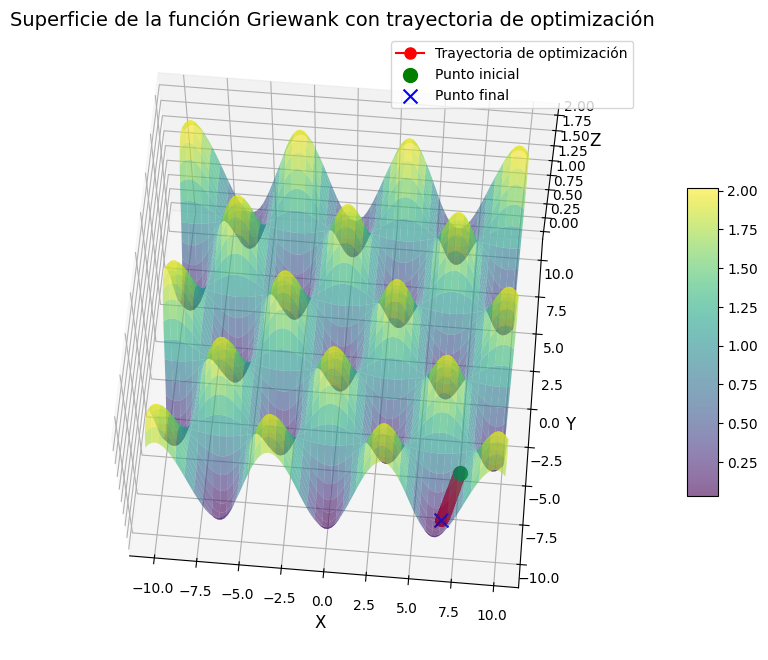

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

# Optimizador (el mismo que antes, omitido por brevedad)
# Se asume que `numerical_optimizer` ya está definido.

# Punto inicial y cálculo de la trayectoria
x0 = np.array([7.5, -7.5])
result = numerical_optimizer(x0, griewank, max_iter=100, eta=0.01)

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j], 0])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D con mejoras
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Agregar la trayectoria de optimización
trajectory = result[:, :2]
z_trajectory = np.array([griewank(np.array([x[0], x[1], 0])) for x in trajectory])
ax.plot(trajectory[:, 0], trajectory[:, 1], z_trajectory, 'r-o', label='Trayectoria de optimización', markersize=8)

# Destacar el punto inicial y final
ax.scatter(x0[0], x0[1], griewank(np.array([x0[0], x0[1], 0])), color='green', s=100, label='Punto inicial', marker='o')
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], z_trajectory[-1], color='blue', s=100, label='Punto final', marker='x')

# Ajustes adicionales
ax.set_title('Superficie de la función Griewank con trayectoria de optimización', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)  # Cambiar ángulo de la cámara para mayor claridad
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

plt.show()


### Gradiente input 3D

In [ ]:
# Punto inicial
x0 = np.array([7.5, 7.5, 6.9])
result = numerical_optimizer(x0, griewank, max_iter=300, eta=0.01)

print(f"Mejor solución encontrada: {result[-1]}")
print(f"Valor de la función en la mejor solución: {griewank(result[-1])}")



Mejor solución encontrada: [6.33252411 8.83672155 5.51354505]
Valor de la función en la mejor solución: 2.034463637036169


In [ ]:
!pip install pyswarms

## PSO

2024-11-29 23:46:15,435 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.28e-5
2024-11-29 23:46:16,453 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.27659295026972e-05, best pos: [-0.00742583 -0.00778872]


Mejor posición encontrada por PSO: [-0.00742583 -0.00778872]
Mejor costo encontrado por PSO: 4.27659295026972e-05


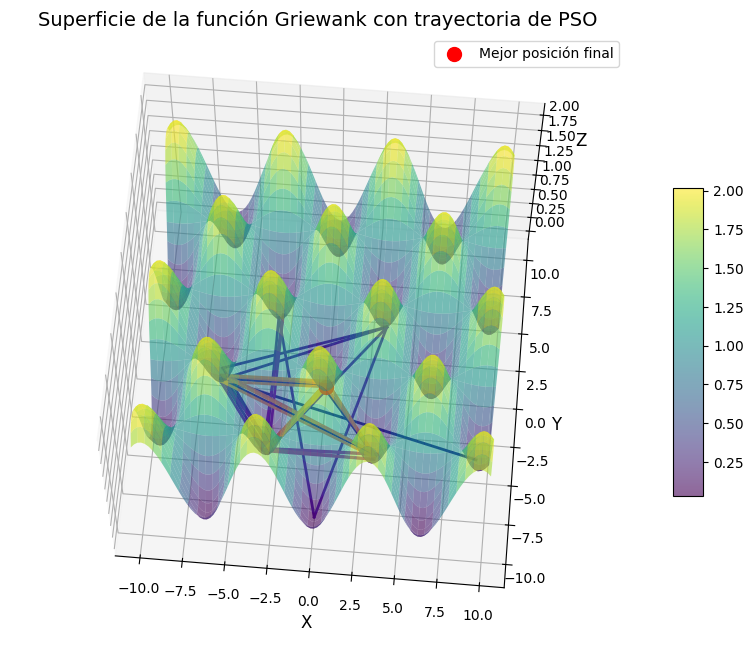

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyswarms as ps
import matplotlib.cm as cm
np.random.seed(0)

# Wrapping the function for PSO
def griewank_pso(x):
    return np.array([griewank(p) for p in x])

# Configuración de los límites de búsqueda
bounds = (np.array([-10, -10]), np.array([10, 10]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer = ps.single.GlobalBestPSO(n_particles=60, dimensions=2, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Griewank
cost, pos = optimizer.optimize(griewank_pso, iters=100)

# Extraer las posiciones de todas las partículas
pos_history = np.array(optimizer.pos_history)  # (n_iters, n_particles, n_dimensions)

# Identificar el mejor valor de costo y su posición final
best_costs = [min(griewank_pso(positions)) for positions in pos_history]
best_positions = [positions[np.argmin(griewank_pso(positions))] for positions in pos_history]

final_best_position = best_positions[np.argmin(best_costs)]

# Resultados
print(f"Mejor posición encontrada por PSO: {final_best_position}")
print(f"Mejor costo encontrado por PSO: {cost}")

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D con mejoras
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Graficar la trayectoria de la mejor partícula
colors = cm.plasma(np.linspace(0, 1, len(pos_history) - 1))
for i in range(len(pos_history) - 1):
    best_position_i = best_positions[i]
    best_position_next = best_positions[i + 1]
    ax.plot(
        [best_position_i[0], best_position_next[0]],
        [best_position_i[1], best_position_next[1]],
        [griewank(np.array([best_position_i[0], best_position_i[1]])),
         griewank(np.array([best_position_next[0], best_position_next[1]]))],
        color=colors[i], linewidth=2,
    )

# Destacar la mejor posición final
ax.scatter(final_best_position[0], final_best_position[1], griewank(final_best_position), color='red', s=100, label='Mejor posición final', marker='o')

# Ajustes adicionales
ax.set_title('Superficie de la función Griewank con trayectoria de PSO', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)  # Cambiar ángulo de la cámara para mayor claridad
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

plt.show()


In [ ]:
np.random.seed(0)

# Configuración de los límites de búsqueda
bounds = (np.array([-10, -10, -10]), np.array([10, 10,10]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer_3D = ps.single.GlobalBestPSO(n_particles=40, dimensions=3, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Griewank
cost_3D, pos_3D = optimizer_3D.optimize(griewank_pso, iters=100)


# Resultados
print(f"Mejor posición encontrada por PSO: {pos_3D}")
print(f"Mejor costo encontrado por PSO: {cost_3D}")
print("El algoritmo PSO con 3 features encontró como mínimo, el mínimo global")

2024-11-29 23:15:56,857 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.56e-5
2024-11-29 23:15:57,465 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5644035207706963e-05, best pos: [-0.00258523  0.00433929  0.0067427 ]


Mejor posición encontrada por PSO: [-0.00258523  0.00433929  0.0067427 ]
Mejor costo encontrado por PSO: 1.5644035207706963e-05
El algoritmo PSO con 3 features encontró como mínimo, el mínimo global


## GIF PSO

2024-11-29 23:47:04,709 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.35e-6
2024-11-29 23:47:05,188 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3469684670974758e-06, best pos: [-0.00028239 -0.00228541]
2024-11-29 23:47:05,576 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-11-29 23:47:05,578 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


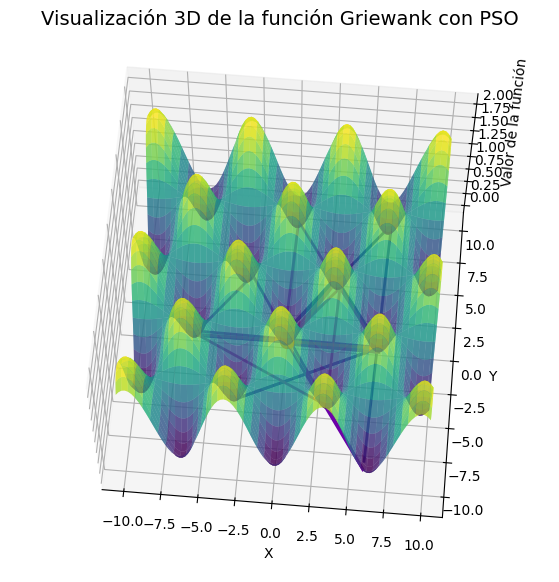

In [ ]:
# Código modificado para animación con mejores posiciones
import pyswarms as ps
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import numpy as np

# Wrapping the function for PSO
def griewank(x):
    sum_part = np.sum(x**2 / 4000.0)
    prod_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return sum_part - prod_part + 1

def griewank_pso(x):
    return np.array([griewank(p) for p in x])

# Configuración de los límites de búsqueda
bounds = (np.array([-10, -10]), np.array([10, 10]))  # Límites para cada dimensión

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer = ps.single.GlobalBestPSO(n_particles=60, dimensions=2, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Griewank
cost, pos = optimizer.optimize(griewank_pso, iters=100)

# Extraer las posiciones de todas las partículas
pos_history = np.array(optimizer.pos_history)  # (n_iters, n_particles, n_dimensions)

# Identificar las mejores posiciones por iteración
best_positions = [positions[np.argmin(griewank_pso(positions))] for positions in pos_history]

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)]).reshape(100, 100)

# Crear la figura 3D para la animación
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Función de inicialización para la animación
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

    # Gradiente de colores para la trayectoria
    colors = cm.plasma(np.linspace(0, 1, frame + 1))

    # Graficar la trayectoria de la mejor partícula acumulativamente
    for i in range(frame):
        best_position_i = best_positions[i]
        best_position_next = best_positions[i + 1]
        ax.plot(
            [best_position_i[0], best_position_next[0]],
            [best_position_i[1], best_position_next[1]],
            [griewank(best_position_i), griewank(best_position_next)],
            color=colors[i], linewidth=2,
        )

    # Destacar la mejor posición actual
    best_pos = best_positions[frame]
    ax.scatter(
        best_pos[0], best_pos[1],
        griewank(best_pos),
        color='red', s=100, label='Mejor solución'
    )

    ax.set_title('Visualización 3D de la función Griewank con PSO', fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(pos_history), init_func=init, blit=False)

# Guardar el GIF
ani.save('griewank_PSO_trajectory_3d.gif', writer='imagemagick', fps=30)

# Mostrar el GIF
display(Image(url='griewank_PSO_trajectory_3d.gif'))


## Pygad

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Mejor solución encontrada: [-0.04446184  0.0165638 ]
Costo asociado a la solución: 0.0010573490459107049


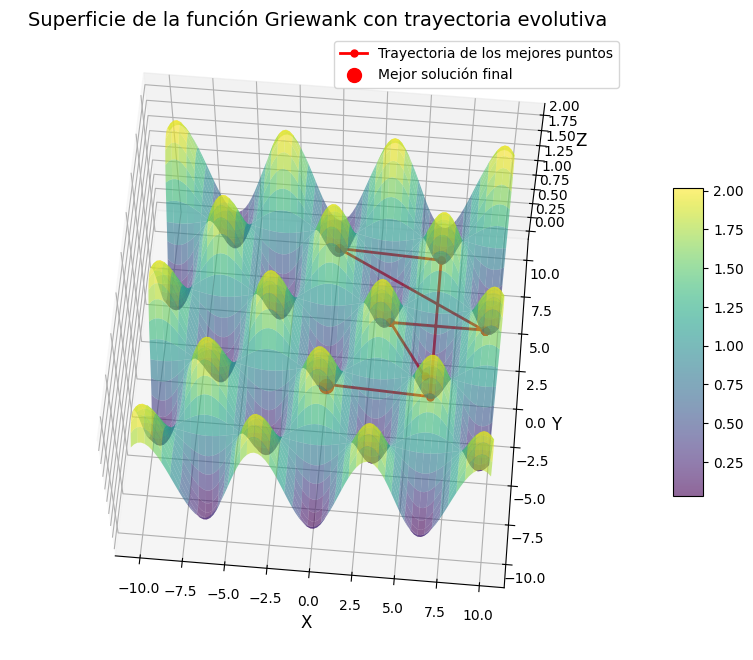

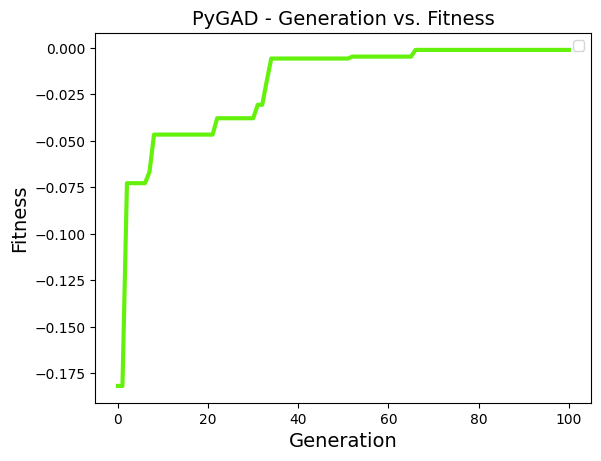

In [ ]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Wrapping the function for PyGAD
def fitness_function(ga_instance, solution, solution_idx):
    # PyGAD maximiza por defecto, por lo que invertimos el signo para minimizar
    return -griewank(solution)

# Lista para almacenar los mejores puntos en cada generación
best_solutions = []

# Función para registrar el mejor punto al final de cada generación
def on_generation(ga_instance):
    best_solutions.append(ga_instance.best_solution()[0])  # Almacenar solo los genes de la mejor solución

# Configuración del algoritmo genético
gene_space = {'low': -10, 'high': 10}  # Rango de valores para cada gen

ga_instance = pygad.GA(
    num_generations=100,          # Número de generaciones
    num_parents_mating=10,        # Número de padres para apareamiento
    fitness_func=fitness_function,  # Función de fitness
    sol_per_pop=20,               # Número de soluciones por población
    num_genes=2,                  # Dimensión del problema
    gene_space=gene_space,        # Espacio de búsqueda
    parent_selection_type="sss",  # Selección de padres
    keep_parents=2,               # Número de padres que se mantienen
    crossover_type="single_point", # Tipo de crossover
    mutation_type="random",       # Tipo de mutación
    mutation_num_genes=1,    # Número de genes que se mutan
    random_seed=0,               # Semilla para reproducibilidad
    on_generation=on_generation   # Registrar el mejor punto al final de cada generación
)

# Correr el algoritmo genético
ga_instance.run()

# Convertir la lista de mejores soluciones en un array
best_solutions = np.array(best_solutions)

# Obtener la mejor solución
solution, solution_fitness, _ = ga_instance.best_solution()
solution_cost = -solution_fitness  # Invertimos el signo porque maximizamos

# Resultados
print(f"Mejor solución encontrada: {solution}")
print(f"Costo asociado a la solución: {solution_cost}")

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Destacar la trayectoria de los mejores puntos a través de las generaciones
z_best_solutions = np.array([griewank(sol) for sol in best_solutions])
ax.plot(
    best_solutions[:, 0], best_solutions[:, 1], z_best_solutions,
    'r-o', label='Trayectoria de los mejores puntos', markersize=5, linewidth=2
)

# Destacar la mejor posición final encontrada
ax.scatter(solution[0], solution[1], griewank(solution), color='red', s=100, label='Mejor solución final', marker='o')

# Ajustes adicionales
ax.set_title('Superficie de la función Griewank con trayectoria evolutiva', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

# Grafica del error atraves de las iteraciones
ga_instance.plot_fitness()

plt.show()







In [ ]:
ga_instance_3D = pygad.GA(
    num_generations=100,          # Número de generaciones
    num_parents_mating=10,        # Número de padres para apareamiento
    fitness_func=fitness_function,  # Función de fitness
    sol_per_pop=20,               # Número de soluciones por población
    num_genes=3,                  # Dimensión del problema (x, y, z)
    gene_space=gene_space,        # Espacio de búsqueda
    parent_selection_type="sss",  # Selección de padres
    keep_parents=2,               # Número de padres que se mantienen
    crossover_type="single_point", # Tipo de crossover
    mutation_type="random",       # Tipo de mutación
    mutation_num_genes=1,    # Porcentaje de genes que se mutan
    random_seed=0                # Semilla para reproducibilidad
)

# Correr el algoritmo genético
ga_instance_3D.run()

# Obtener la mejor solución
solution_3D, solution_fitness_3D, _ = ga_instance_3D.best_solution()
solution_cost_3D = -solution_fitness_3D  # Invertimos el signo porque maximizamos

# Resultados
print(f"Mejor solución encontrada para un X en 3 dimensiones: {solution_3D}")
print(f"Costo asociado a la solución: {solution_cost_3D}")

Mejor solución encontrada para un X en 3 dimensiones: [-3.15547337  0.0705564   5.40522881]
Costo asociado a la solución: 0.011352867131001365


Gif PSO

In [ ]:
import matplotlib.animation as animation
import pyswarms as ps
from IPython.display import Image, display
import matplotlib.cm as cm


# Configuración de los límites de búsqueda
bounds = (np.array([-10, -10]), np.array([10, 10]))

# Parámetros de PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Inicializar el optimizador PSO
optimizer = ps.single.GlobalBestPSO(n_particles=60, dimensions=2, options=options, bounds=bounds)

# Ejecutar PSO para minimizar la función Griewank
cost, pos = optimizer.optimize(griewank_pso, iters=100)

# Extraer las posiciones de todas las partículas
pos_history = np.array(optimizer.pos_history)  # (n_iters, n_particles, n_dimensions)

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear la figura 3D para la animación
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Función de inicialización para la animación
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

    # Gradiente de colores para la trayectoria
    colors = cm.plasma(np.linspace(0, 1, len(pos_history) - 1))

    # Graficar la trayectoria de la mejor partícula
    for i in range(min(frame, len(pos_history) - 1)):
        best_position_i = pos_history[i].mean(axis=0)
        best_position_next = pos_history[i + 1].mean(axis=0)
        ax.plot(
            [best_position_i[0], best_position_next[0]],
            [best_position_i[1], best_position_next[1]],
            [griewank(np.array([best_position_i[0], best_position_i[1]])),
             griewank(np.array([best_position_next[0], best_position_next[1]]))],
            color=colors[i], linewidth=2,
        )

    # Destacar la mejor posición final
    if frame < len(pos_history):
        best_pos = pos_history[frame].mean(axis=0)
        ax.scatter(
            best_pos[0], best_pos[1],
            griewank(best_pos),
            color='red', s=100, label='Mejor solución'
        )

    ax.set_title('Visualización 3D de la función Griewank con PSO', fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(pos_history), init_func=init, blit=False)

# Guardar el GIF
ani.save('griewank_pso_trajectory_3d.gif', writer='imagemagick', fps=30)

# Mostrar el GIF
display(Image(url='griewank_pso_trajectory_3d.gif'))


## Evolución diferencial griewank

3 dimensiones

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution


# Configuración del algoritmo
bounds = [(-10, 10), (-10, 10), (-10, 10)]  # Límites para cada dimensión

result = differential_evolution(
    griewank,
    bounds,
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    mutation=(0.4, 1.5),
    recombination=0.8,
    seed=0,
    disp=True
)

# Resultados
print(f"\nMejor solución encontrada: {result.x}")
print(f"Costo asociado a la mejor solución: {result.fun}")
print(f"Convergencia alcanzada: {result.success}")


differential_evolution step 1: f(x)= 0.18726912646622118
differential_evolution step 2: f(x)= 0.18726912646622118
differential_evolution step 3: f(x)= 0.18726912646622118
differential_evolution step 4: f(x)= 0.18726912646622118
differential_evolution step 5: f(x)= 0.12419698964334902
differential_evolution step 6: f(x)= 0.12419698964334902
differential_evolution step 7: f(x)= 0.08286180458621883
differential_evolution step 8: f(x)= 0.08286180458621883
differential_evolution step 9: f(x)= 0.08286180458621883
differential_evolution step 10: f(x)= 0.08286180458621883
differential_evolution step 11: f(x)= 0.08286180458621883
differential_evolution step 12: f(x)= 0.07031993334805586
differential_evolution step 13: f(x)= 0.03964509226304935
differential_evolution step 14: f(x)= 0.03964509226304935
differential_evolution step 15: f(x)= 0.03964509226304935
differential_evolution step 16: f(x)= 0.03964509226304935
differential_evolution step 17: f(x)= 0.03964509226304935
differential_evolution 

## Differential gif

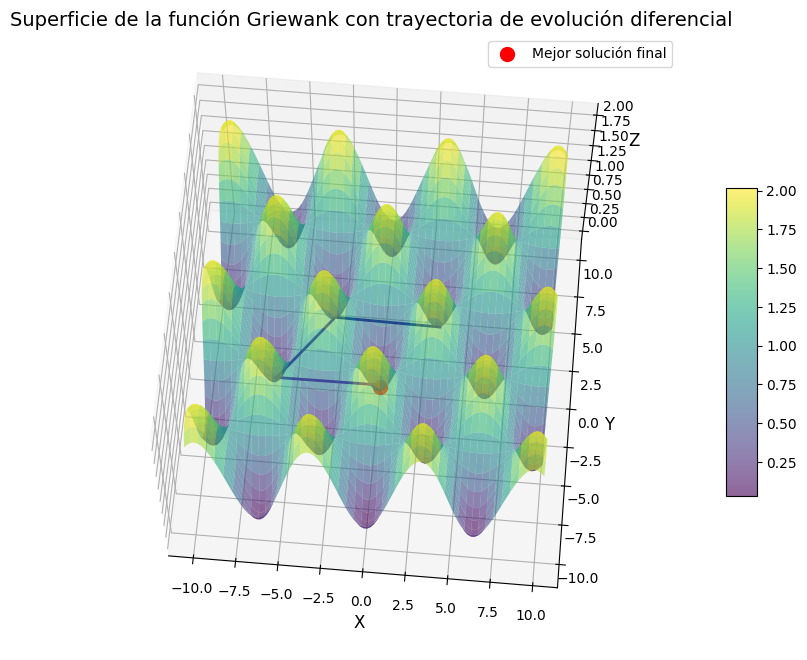


Mejor solución encontrada: [1.28500544e-09 1.19080146e-08]
Costo asociado a la mejor solución: 0.0
Convergencia alcanzada: True


In [75]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

np.random.seed(0)
# Configuración de los límites de búsqueda
bounds = [(-10, 10), (-10, 10)]  # Límites para cada dimensión

# Lista para registrar las soluciones óptimas en cada iteración
solutions_history = []

# Callback para registrar la trayectoria
def callback(x, convergence):
    solutions_history.append(np.array(x))  # Convertir la solución a un array

# Ejecutar Evolución Diferencial
result = differential_evolution(
    griewank,
    bounds,
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    mutation=(0.4, 1.5),
    recombination=0.8,
    seed=0,
    callback=callback,
)

# Convertir la trayectoria a un array
solutions_history = np.array(solutions_history)

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j], 0])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Graficar la trayectoria de las soluciones óptimas
colors = cm.plasma(np.linspace(0, 1, len(solutions_history) - 1))
for i in range(len(solutions_history) - 1):
    current = solutions_history[i]
    next_pos = solutions_history[i + 1]
    ax.plot(
        [current[0], next_pos[0]],
        [current[1], next_pos[1]],
        [griewank(np.array([current[0], current[1], 0])), griewank(np.array([next_pos[0], next_pos[1], 0]))],
        color=colors[i], linewidth=2,
    )

# Destacar la mejor posición final
final_solution = result.x
ax.scatter(
    final_solution[0], final_solution[1], griewank(final_solution),
    color='red', s=100, label='Mejor solución final', marker='o'
)

# Ajustes adicionales
ax.set_title('Superficie de la función Griewank con trayectoria de evolución diferencial', fontsize=14)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.view_init(elev=65, azim=-85)  # Cambiar ángulo de la cámara para mayor claridad
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.legend(fontsize=10)

plt.show()

print(f"\nMejor solución encontrada: {result.x}")
print(f"Costo asociado a la mejor solución: {result.fun}")
print(f"Convergencia alcanzada: {result.success}")



2024-11-30 02:05:55,705 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-11-30 02:05:55,710 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


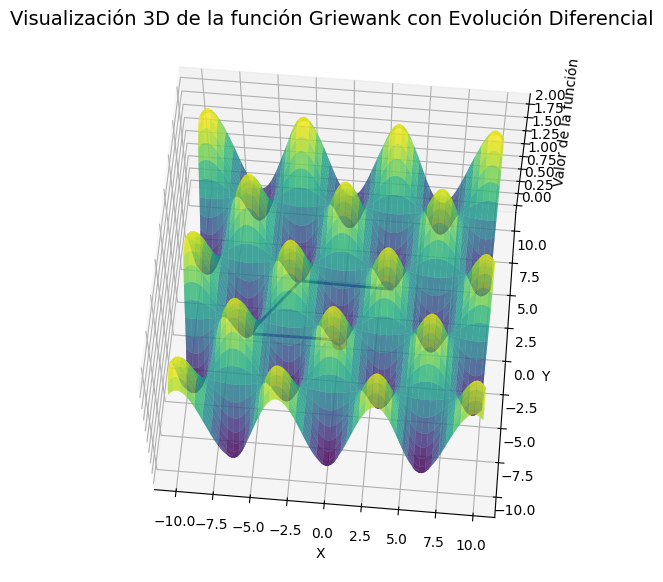

In [76]:
# Lista para registrar las soluciones óptimas en cada iteración
solutions_history = []

# Callback para registrar la trayectoria
def callback(x, convergence):
    solutions_history.append(np.array(x))  # Registrar la solución actual como array

# Ejecutar Evolución Diferencial
result = differential_evolution(
    griewank,
    bounds,  # Definido previamente
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    mutation=(0.4, 1.5),
    recombination=0.8,
    seed=0,
    callback=callback,
)

# Verificar si `solutions_history` tiene datos
if not solutions_history:
    raise ValueError("La lista `solutions_history` está vacía. Verifica el callback o la ejecución del algoritmo.")

# Crear la figura 3D para la animación
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Función de inicialización para la animación
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

    # Gradiente de colores para la trayectoria
    colors = cm.plasma(np.linspace(0, 1, len(solutions_history) - 1))

    for i in range(min(frame, len(solutions_history) - 1)):
        current = solutions_history[i]
        next_pos = solutions_history[i + 1]
        ax.plot(
            [current[0], next_pos[0]],
            [current[1], next_pos[1]],
            [griewank(current), griewank(next_pos)],
            color=colors[i],
            linewidth=2,
        )

    # Destacar la mejor posición final encontrada
    if frame < len(solutions_history):
        ax.scatter(
            solutions_history[frame][0],
            solutions_history[frame][1],
            griewank(solutions_history[frame]),
            color='red',
            s=100,
            label='Mejor solución'
        )

    ax.set_title('Visualización 3D de la función Griewank con Evolución Diferencial', fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(solutions_history), init_func=init, blit=False)

# Guardar el GIF
ani.save('griewank_evolutionary_trajectory_3d.gif', writer='imagemagick', fps=30)

# Mostrar el GIF
display(Image(url='griewank_evolutionary_trajectory_3d.gif'))


## Gifs griewank

2024-11-30 00:11:09,736 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-11-30 00:11:09,738 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


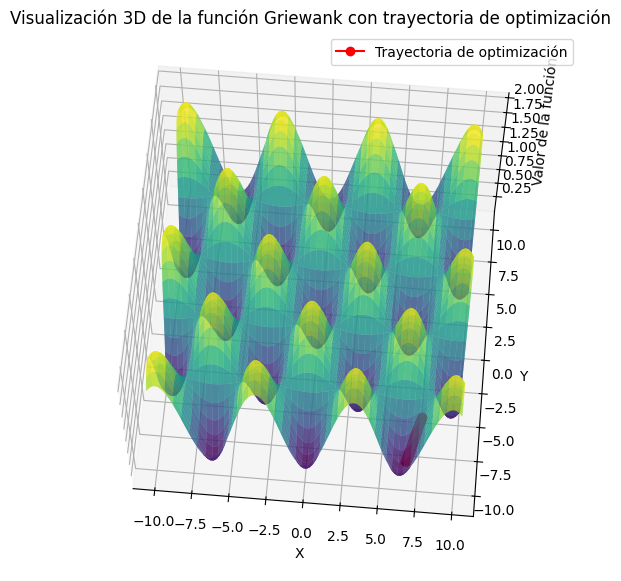

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display

# Definición de la función Griewank
def griewank(x):
    n = len(x)
    term1 = np.sum(x**2) / 4000
    term2 = np.prod(np.cos(x / np.sqrt(np.arange(1, n + 1))))
    return 1 + term1 - term2

# Cálculo del gradiente numérico
def numerical_gradient(x, func, h=0.01):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        grad[i] = (func(x + e) - func(x - e)) / (2 * h)
    return grad

# Cálculo de la segunda derivada numérica (diagonal del Hessiano)
def numerical_second_derivative(x, func, h=0.01):
    hess_diag = np.zeros_like(x)
    for i in range(len(x)):
        e = np.zeros_like(x)
        e[i] = h
        hess_diag[i] = (func(x + e) - 2 * func(x) + func(x - e)) / (h ** 2)
    return hess_diag

# Optimizador con el gradiente y el Hessiano
def numerical_optimizer(x0, func, max_iter=100, h=0.01, eta=0.02):
    x = np.zeros((max_iter, len(x0)))
    x[0, :] = x0
    for i in range(1, max_iter):
        grad = numerical_gradient(x[i - 1, :], func, h)
        hess_diag = numerical_second_derivative(x[i - 1, :], func, h)
        step = -eta * grad / (hess_diag + 1e-6)  # Evitar divisiones por cero
        x[i, :] = x[i - 1, :] + step
        if np.linalg.norm(step) < 1e-7:
            break
    return x[:i + 1, :]

# Ejemplo de uso en 2D para visualizar
x0 = np.array([7.5, -7.5])  # Punto inicial en 2D
result = numerical_optimizer(x0, griewank, max_iter=100, eta=0.01)

# Generar datos para la superficie en 3D
x_t = np.linspace(-10, 10, 100)
y_t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_t, y_t)
Z = np.array([griewank(np.array([X[i, j], Y[i, j]])) for i in range(100) for j in range(100)])
Z = Z.reshape(100, 100)

# Crear la figura 3D para la animación
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Función de inicialización para la animación
def init():
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    return []

# Función de actualización para cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    ax.plot(result[:frame+1, 0], result[:frame+1, 1],
            [griewank(np.array([point[0], point[1]])) for point in result[:frame+1]],
            color='r', marker='o', label="Trayectoria de optimización")
    ax.set_title('Visualización 3D de la función Griewank con trayectoria de optimización')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Valor de la función')
    ax.legend()
    ax.view_init(elev=65, azim=-85)
    return []

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(result), init_func=init, blit=False)

# Guardar el GIF
ani.save('griewank_optimization_trajectory_3d.gif', writer='imagemagick', fps=30)

# Mostrar el GIF
display(Image(url='griewank_optimization_trajectory_3d.gif'))
